In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [2]:
customer_data = pd.read_csv('Mall_Customers.csv')

In [3]:
customer_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
customer_data.shape

(200, 5)

In [5]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
customer_data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [7]:
customer_data.drop(['CustomerID'], axis=1, inplace=True)

In [8]:
customer_data

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


C:\Users\oluwa\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\oluwa\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\oluwa\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

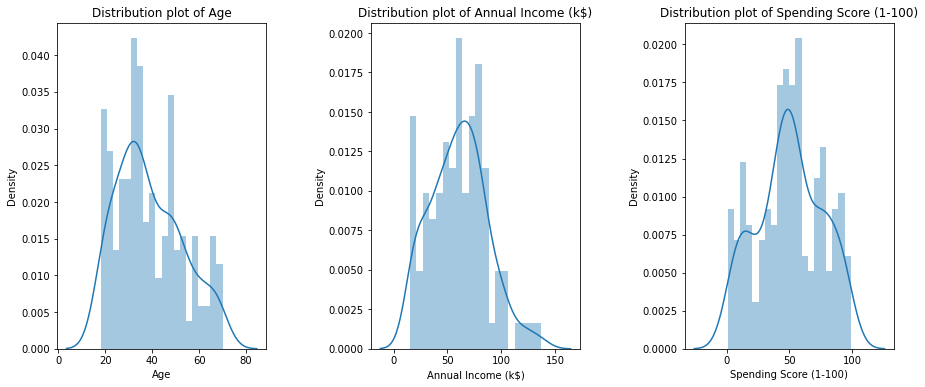

In [9]:
plt.figure(1, figsize=(15,6))
n=0
for x in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
    n+=1
    plt.subplot(1, 3, n)
    plt.subplots_adjust(hspace=0.5, wspace=0.5)
    sns.distplot(customer_data[x], bins=20)
    plt.title(f'Distribution plot of {x}')
plt.show()

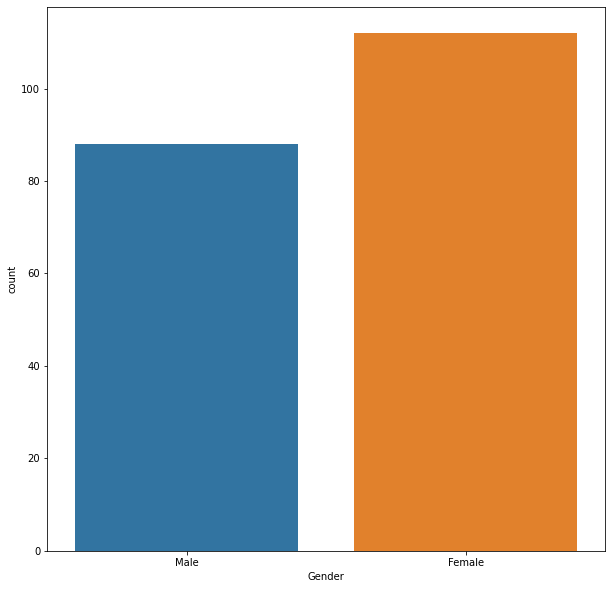

In [10]:
plt.figure(figsize=(10,10))
sns.countplot(x='Gender', data=customer_data)
plt.show()

Choosing the Annual Income and Spending Score columns

In [11]:
select_customer_data = customer_data.iloc[:,[2,3]].values

In [12]:
print(select_customer_data)

[[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 42  60]
 [ 43  54]
 [ 43  60]
 [ 43  45]
 [ 43  41]
 [ 44  50]
 [ 44  46]
 [ 46  51]
 [ 46  46]
 [ 46  56]
 [ 46  55]
 [ 47  52]
 [ 47  59]
 [ 48  51]
 [ 48  59]
 [ 48  50]
 [ 48  48]
 [ 48  59]
 [ 48  47]
 [ 49  55]
 [ 49  42]
 [ 50  49]
 [ 50  56]
 [ 54  47]
 [ 54  54]
 [ 54  53]
 [ 54  48]
 [ 54  52]
 [ 54  42]
 [ 54  51]
 [ 54  55]
 [ 54  41]
 [ 54  44]
 [ 54  57]
 [ 54  46]
 [ 57  58]
 [ 57  55]
 [ 58  60]
 [ 58  46]
 [ 59  55]

In [13]:
scaler = StandardScaler()

In [14]:
scaled_customer_data = scaler.fit_transform(select_customer_data)

In [15]:
scaled_customer_data

array([[-1.73899919, -0.43480148],
       [-1.73899919,  1.19570407],
       [-1.70082976, -1.71591298],
       [-1.70082976,  1.04041783],
       [-1.66266033, -0.39597992],
       [-1.66266033,  1.00159627],
       [-1.62449091, -1.71591298],
       [-1.62449091,  1.70038436],
       [-1.58632148, -1.83237767],
       [-1.58632148,  0.84631002],
       [-1.58632148, -1.4053405 ],
       [-1.58632148,  1.89449216],
       [-1.54815205, -1.36651894],
       [-1.54815205,  1.04041783],
       [-1.54815205, -1.44416206],
       [-1.54815205,  1.11806095],
       [-1.50998262, -0.59008772],
       [-1.50998262,  0.61338066],
       [-1.43364376, -0.82301709],
       [-1.43364376,  1.8556706 ],
       [-1.39547433, -0.59008772],
       [-1.39547433,  0.88513158],
       [-1.3573049 , -1.75473454],
       [-1.3573049 ,  0.88513158],
       [-1.24279661, -1.4053405 ],
       [-1.24279661,  1.23452563],
       [-1.24279661, -0.7065524 ],
       [-1.24279661,  0.41927286],
       [-1.20462718,

Choosing the number of clusters using wcss

WCSS ---> Within Clusters Sum of Squares(Elbow Method)

In [16]:
#finding wcss value for different number of clusters

wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_customer_data)
    
    wcss.append(kmeans.inertia_)

C:\Users\oluwa\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


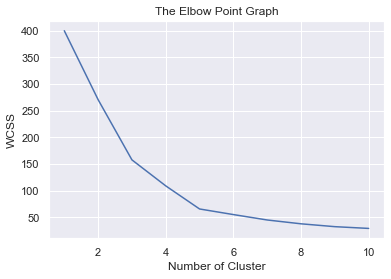

In [17]:
#plot an elbow graph

sns.set()
plt.plot(range(1,11), wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Cluster')
plt.ylabel('WCSS')
plt.show()

The Optimum number of clusters = 5

In [18]:
#Training the K-means Clustering model


kmeans = KMeans(n_clusters=5, init='k-means++', random_state=0)

#return a label for each data point based on their cluster
clusters = kmeans.fit_predict(scaled_customer_data)
print(clusters)

[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 1 4 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 1 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 1 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


Visualizing the clusters

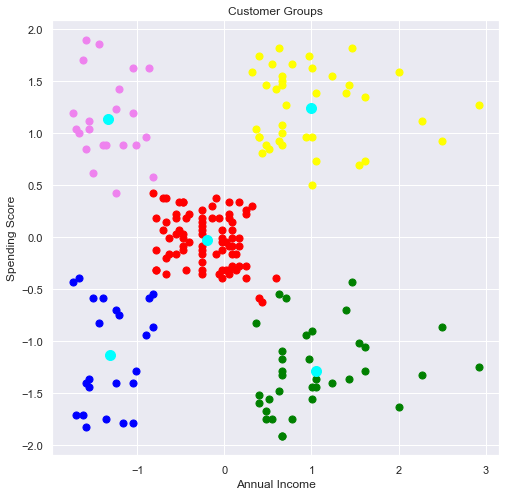

In [19]:
#plotting the clusters

plt.figure(figsize=(8,8))
plt.scatter(scaled_customer_data[clusters==0,0], scaled_customer_data[clusters==0,1], s=50, c='green', label='Cluster 1')
plt.scatter(scaled_customer_data[clusters==1,0], scaled_customer_data[clusters==1,1], s=50, c='red', label='Cluster 2')
plt.scatter(scaled_customer_data[clusters==2,0], scaled_customer_data[clusters==2,1], s=50, c='yellow', label='Cluster 3')
plt.scatter(scaled_customer_data[clusters==3,0], scaled_customer_data[clusters==3,1], s=50, c='violet', label='Cluster 4')
plt.scatter(scaled_customer_data[clusters==4,0], scaled_customer_data[clusters==4,1], s=50, c='blue', label='Cluster 5')

#plotting the centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='cyan', label='Centroids')
plt.title('Customer Groups')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

In [20]:
kmeans.inertia_

65.56840815571681

In [21]:
cluster_list=[]
for c in clusters:
    cluster_list.append(c)

In [22]:
cluster_list

[4,
 3,
 4,
 3,
 4,
 3,
 4,
 3,
 4,
 3,
 4,
 3,
 4,
 3,
 4,
 3,
 4,
 3,
 4,
 3,
 4,
 3,
 4,
 3,
 4,
 3,
 4,
 3,
 4,
 3,
 4,
 3,
 4,
 3,
 4,
 3,
 4,
 3,
 4,
 3,
 4,
 3,
 4,
 1,
 4,
 3,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 0,
 2,
 1,
 2,
 0,
 2,
 0,
 2,
 1,
 2,
 0,
 2,
 0,
 2,
 0,
 2,
 0,
 2,
 1,
 2,
 0,
 2,
 0,
 2,
 0,
 2,
 0,
 2,
 0,
 2,
 0,
 2,
 0,
 2,
 0,
 2,
 0,
 2,
 0,
 2,
 0,
 2,
 0,
 2,
 0,
 2,
 0,
 2,
 0,
 2,
 0,
 2,
 0,
 2,
 0,
 2,
 0,
 2,
 0,
 2,
 0,
 2,
 0,
 2,
 0,
 2,
 0,
 2,
 0,
 2,
 0,
 2,
 0,
 2,
 0,
 2]

In [23]:
customer_data['Cluster'] = cluster_list

In [24]:
customer_data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,Male,19,15,39,4
1,Male,21,15,81,3
2,Female,20,16,6,4
3,Female,23,16,77,3
4,Female,31,17,40,4


In [25]:
customer_data['Cluster'].value_counts()

1    81
2    39
0    35
4    23
3    22
Name: Cluster, dtype: int64

#### Determine the different customer segmentation

In [26]:
customer_data[customer_data['Cluster'] == 0].head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
124,Female,23,70,29,0
128,Male,59,71,11,0
130,Male,47,71,9,0
134,Male,20,73,5,0
136,Female,44,73,7,0


In [27]:
customer_data[customer_data['Cluster'] == 1].head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
43,Female,31,39,61,1
46,Female,50,40,55,1
47,Female,27,40,47,1
48,Female,29,40,42,1
49,Female,31,40,42,1


In [28]:
customer_data[customer_data['Cluster'] == 2].head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
123,Male,39,69,91,2
125,Female,31,70,77,2
127,Male,40,71,95,2
129,Male,38,71,75,2
131,Male,39,71,75,2


In [29]:
customer_data[customer_data['Cluster'] == 3].head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
1,Male,21,15,81,3
3,Female,23,16,77,3
5,Female,22,17,76,3
7,Female,23,18,94,3
9,Female,30,19,72,3


In [30]:
customer_data[customer_data['Cluster'] == 4].head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,Male,19,15,39,4
2,Female,20,16,6,4
4,Female,31,17,40,4
6,Female,35,18,6,4
8,Male,64,19,3,4
